In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from scipy.stats import zscore
import numpy as np


cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


z_scores = df[cols_to_check].apply(zscore)


outliers = (np.abs(z_scores) > 3)


outliers.sum()

,0
GHI,2477
DNI,7586
DHI,2986
ModA,1604
ModB,2041
WS,3967
WSgust,3665


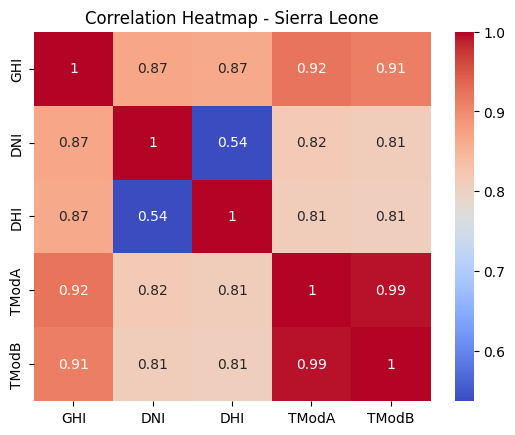

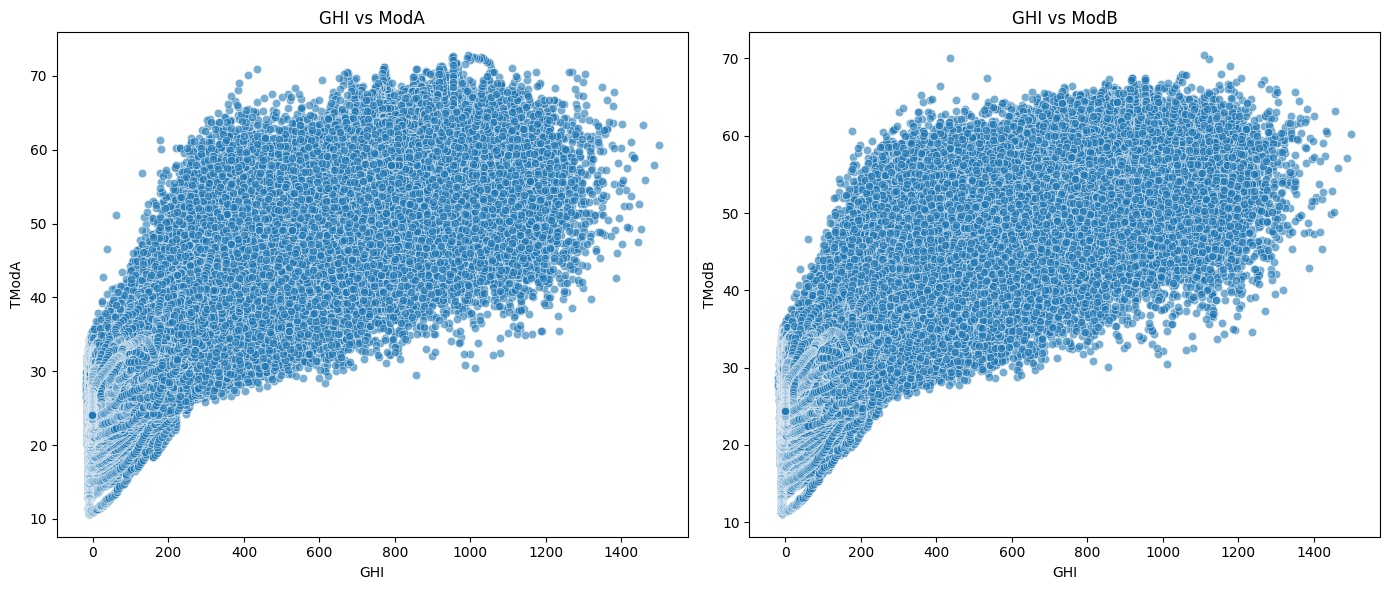

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(ax=axes[0], data=df, x='GHI', y='TModA', alpha=0.6)
axes[0].set_title('GHI vs ModA')

sns.scatterplot(ax=axes[1], data=df, x='GHI', y='TModB', alpha=0.6)
axes[1].set_title('GHI vs ModB')

plt.tight_layout()
plt.show()


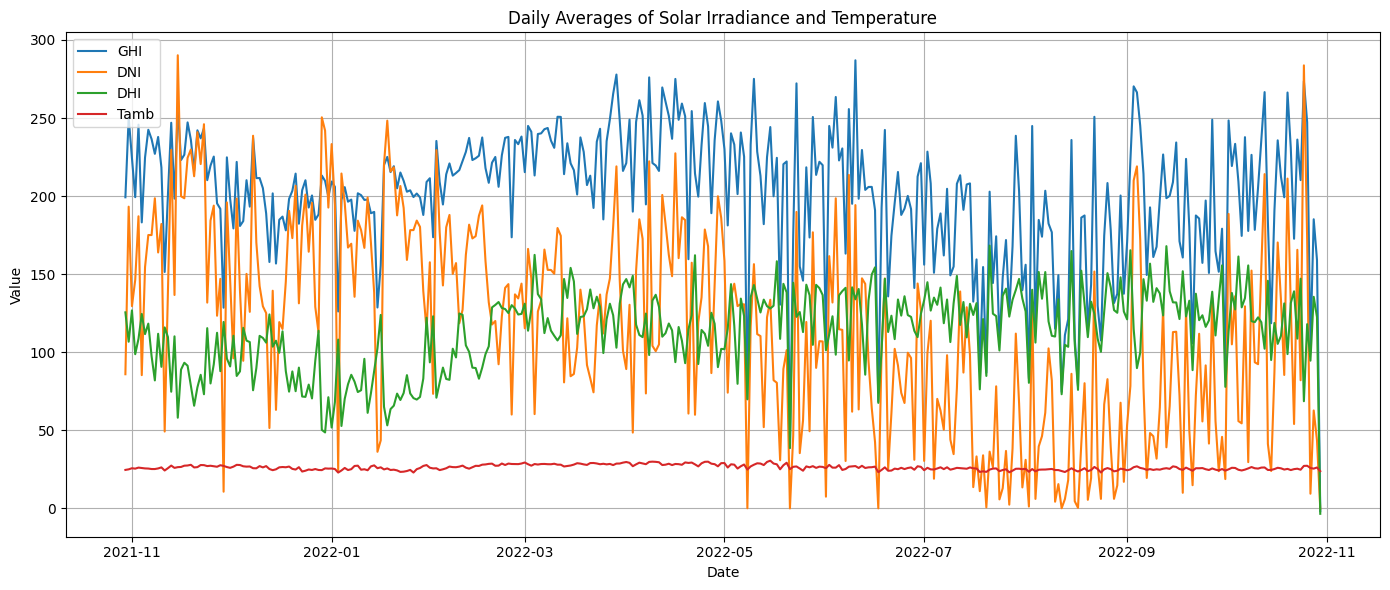

In [10]:
import matplotlib.pyplot as plt


df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df_daily = df.resample('D', on='Timestamp').mean()


plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI')
plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb')
plt.title('Daily Averages of Solar Irradiance and Temperature')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


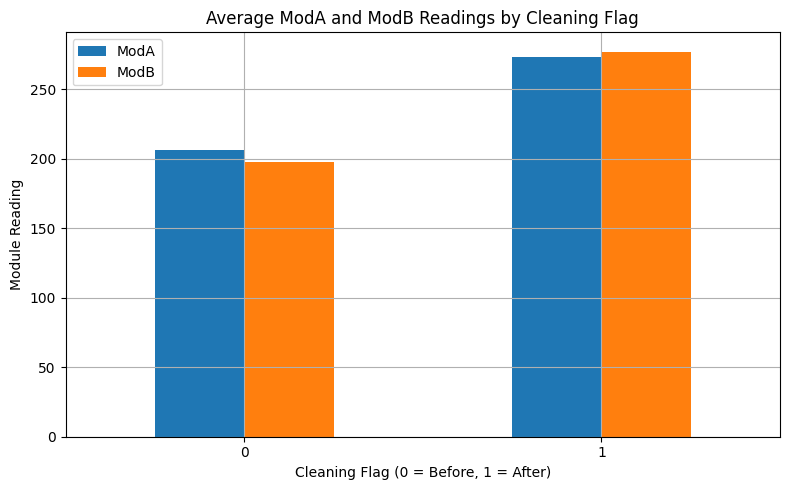

In [11]:
cleaning_effect = df.groupby('Cleaning')[['ModA', 'ModB']].mean()


cleaning_effect.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB Readings by Cleaning Flag')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Module Reading')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

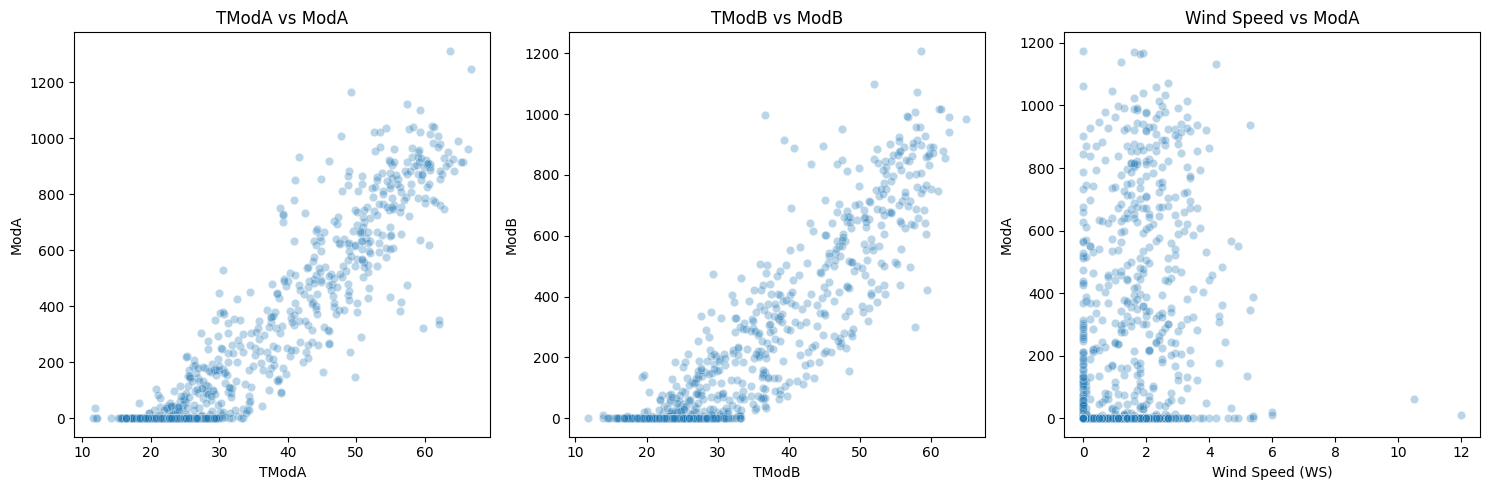

In [12]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.scatterplot(data=df.sample(1000), x='TModA', y='ModA', alpha=0.3)
plt.title('TModA vs ModA')
plt.xlabel('TModA')
plt.ylabel('ModA')


plt.subplot(1, 3, 2)
sns.scatterplot(data=df.sample(1000), x='TModB', y='ModB', alpha=0.3)
plt.title('TModB vs ModB')
plt.xlabel('TModB')
plt.ylabel('ModB')


plt.subplot(1, 3, 3)
sns.scatterplot(data=df.sample(1000), x='WS', y='ModA', alpha=0.3)
plt.title('Wind Speed vs ModA')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('ModA')

plt.tight_layout()
plt.show()


In [13]:
# Keep only rows where all selected columns have z-scores within [-3, 3]
df_clean = df[(np.abs(z_scores) <= 3).all(axis=1)]

# Check how many rows remain
print(f"Original rows: {len(df)}")
print(f"Rows after outlier removal: {len(df_clean)}")


Original rows: 525600
Rows after outlier removal: 509308


In [14]:
# Check for missing values
df_clean.isnull().sum()


,0
Timestamp,0
GHI,0
DNI,0
DHI,0
ModA,0
ModB,0
Tamb,0
RH,0
WS,0
WSgust,0


In [15]:
# Correlation of features with ModA and ModB
corr_modA = df_clean.corr()['ModA'].sort_values(ascending=False)
corr_modB = df_clean.corr()['ModB'].sort_values(ascending=False)

print("Correlation with ModA:\n", corr_modA)
print("\nCorrelation with ModB:\n", corr_modB)


Correlation with ModA:
 ModA             1.000000
ModB             0.999161
GHI              0.994898
TModA            0.928585
TModB            0.912447
DNI              0.869160
DHI              0.866537
Tamb             0.643181
WDstdev          0.550729
WSgust           0.441175
WSstdev          0.426959
WS               0.397123
WD               0.390387
Cleaning         0.009365
Precipitation   -0.061591
Timestamp       -0.093239
BP              -0.168689
RH              -0.587160
Comments              NaN
Name: ModA, dtype: float64

Correlation with ModB:
 ModB             1.000000
ModA             0.999161
GHI              0.994613
TModA            0.927394
TModB            0.911549
DHI              0.867860
DNI              0.867353
Tamb             0.640455
WDstdev          0.548984
WSgust           0.439875
WSstdev          0.426009
WS               0.395850
WD               0.390411
Cleaning         0.011181
Precipitation   -0.061471
Timestamp       -0.087930
BP            

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define selected features
features = ['GHI', 'TModA', 'TModB', 'DNI', 'DHI', 'Tamb']

# Train-test split for ModA
X = df_clean[features]
y_modA = df_clean['ModA']

X_train, X_test, y_train, y_test = train_test_split(X, y_modA, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression for ModA — MSE: {mse:.4f}, R²: {r2:.4f}")


Linear Regression for ModA — MSE: 548.6524, R²: 0.9931


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from google.colab import files

uploaded = files.upload()
import pandas as pd

df = pd.read_csv('sierraleone-bumbuna.csv')


target = 'ModB'
features = df.drop(columns=['Timestamp', 'Comments', 'ModB'])
X = features
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression for ModB — MSE: {mse:.4f}, R²: {r2:.4f}")


Saving sierraleone-bumbuna.csv to sierraleone-bumbuna.csv
Linear Regression for ModB — MSE: 130.7702, R²: 0.9984
